In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('dataset_1.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


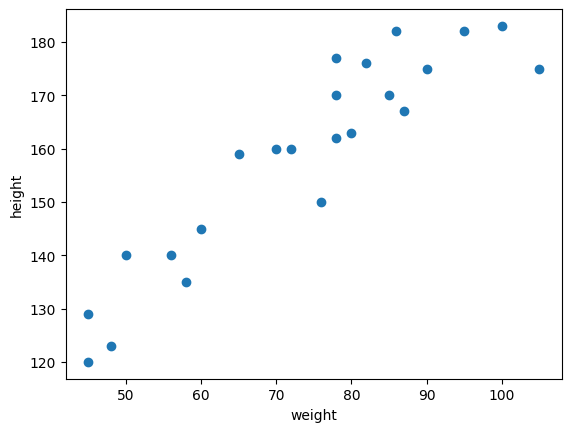

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [9]:
X=df[['Weight']]
y=df['Height']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

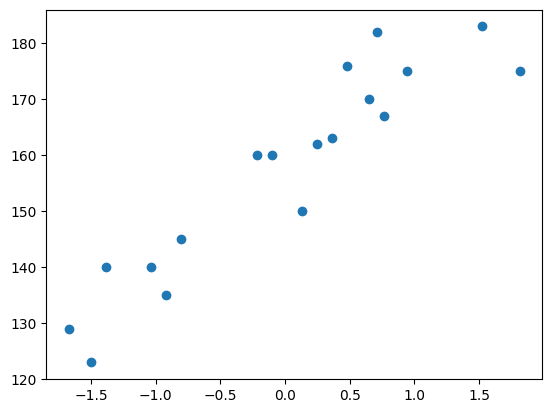

In [14]:
plt.scatter(X_train,y_train)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [16.78981222]
Intercept: 157.5


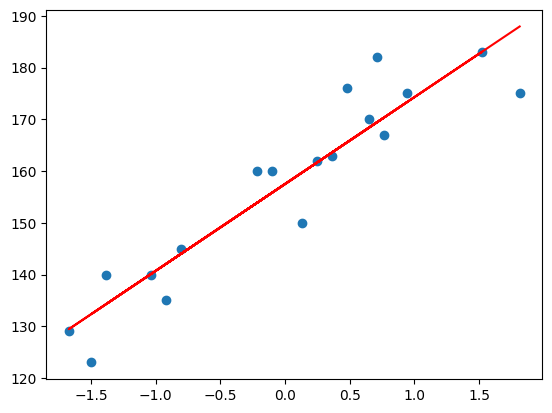

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')
plt.show()

In [23]:
y_pred=regressor.predict(X_test)

In [24]:
y_pred,y_test

(array([163.36419222, 163.36419222, 129.99896063, 180.55234183,
        150.22031311]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

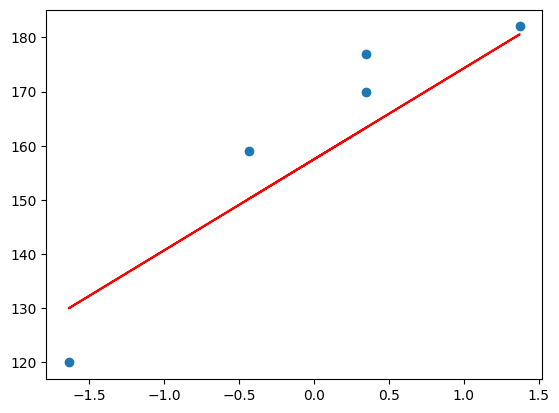

In [27]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

81.82540569167014
8.099584250494331
9.04573964315081


In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8337692879658903


In [30]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7783590506211872

In [33]:
# assumtions
scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.46970909]])

In [35]:
print("The height prediction for weight 80 kg is",regressor.predict(scaled_weight))

The height prediction for weight 80 kg is [165.38632747]


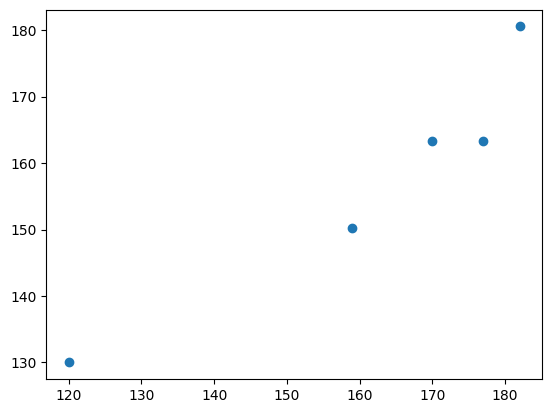

In [36]:
plt.scatter(y_test,y_pred)

In [37]:
residuals=y_test-y_pred
residuals

15    13.635808
9      6.635808
0     -9.998961
8      1.447658
17     8.779687
Name: Height, dtype: float64

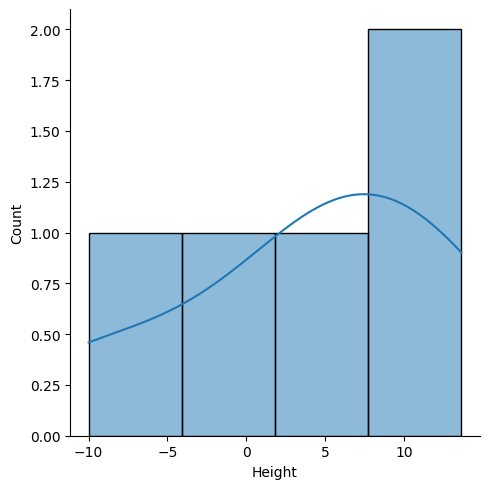

In [40]:
sns.displot(residuals,kde=True)
plt.show()

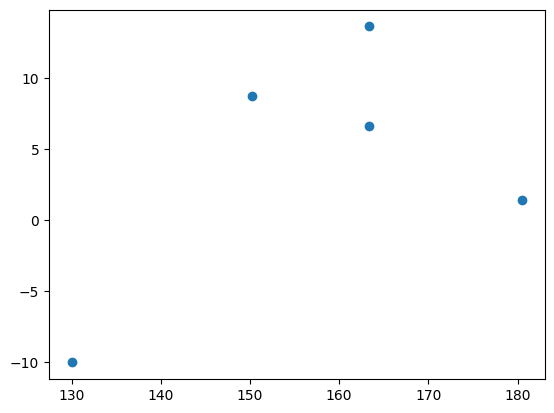

In [42]:
plt.scatter(y_pred,residuals)